In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_office = pd.read_csv('data/final_office.csv')

In [3]:
df_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51792 entries, 0 to 51791
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     51792 non-null  int64  
 1   index          51792 non-null  int64  
 2   season         51792 non-null  int64  
 3   episode        51792 non-null  int64  
 4   episode_name   51792 non-null  object 
 5   director       51792 non-null  object 
 6   writer         51792 non-null  object 
 7   character      51792 non-null  object 
 8   text           51437 non-null  object 
 9   averageRating  51792 non-null  float64
 10  numVotes       51792 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 4.3+ MB


In [4]:
df_office.describe()

,Unnamed: 0,index,season,episode,averageRating,numVotes
count,51792.000000,51792.000000,51792.000000,51792.000000,51792.000000,51792.000000
mean,25895.500000,27550.949548,5.558098,11.941497,8.239620,3153.271779
std,14951.206908,16003.442826,2.361350,7.026540,0.598529,1010.126285
min,0.000000,1.000000,1.000000,1.000000,6.500000,2093.000000
25%,12947.750000,12948.750000,3.000000,6.000000,7.800000,2472.000000
50%,25895.500000,28218.500000,6.000000,11.000000,8.200000,2915.000000
75%,38843.250000,41660.250000,8.000000,18.000000,8.700000,3548.000000
max,51791.000000,54608.000000,9.000000,26.000000,9.800000,9248.000000


In [5]:
df_office.dropna(inplace=True)

In [6]:
df_office['name'] = df_office['episode_name']+' '+df_office['season'].astype(str)+'-'+df_office['episode'].astype(str)

In [7]:
df_vote = df_office.groupby(['season']).sum('numVotes').reset_index()

In [8]:
df_rat = df_office.groupby(['season']).mean('averageRating').reset_index()

In [9]:
df_popular = df_office.groupby(['name']).mean('averageRating').reset_index()
df_popular.sort_values('averageRating',inplace=True,ascending=False)

In [10]:
df_rat.head(50)

,season,Unnamed: 0,index,episode,averageRating,numVotes
0,1,745.094149,746.094149,3.716207,7.924546,4762.164761
1,2,4446.836884,4447.836884,11.370718,8.463559,3964.616840
2,3,10341.158003,10342.158003,12.229138,8.615903,3617.585157
3,4,15034.755760,15543.755760,7.132776,8.545766,3578.724654
4,5,20377.540938,22153.540938,13.553394,8.522813,3259.375087
5,6,27797.874671,30120.874671,13.409462,8.207551,2858.497496
6,7,35062.167128,37385.167128,12.365174,8.328919,3138.739536
7,8,41862.937293,44679.937293,12.609023,7.586015,2318.739248
8,9,48499.538556,51316.538556,12.088916,7.908999,2505.008585


In [11]:
df_vote.head(50)

,season,Unnamed: 0,index,episode,averageRating,numVotes
0,1,1107955,1109442,5526,11783.8,7081339
1,2,26089592,26095459,66712,49655.7,23260407
2,3,60475092,60480940,71516,50385.8,21155638
3,4,52200672,53967920,24765,29670.9,12425332
4,5,145597530,158287050,96839,60895.5,23288235
5,6,210930273,228557197,101751,62278.9,21690279
6,7,240421280,256350091,84788,57111.4,21522337
7,8,278388533,297121583,83850,50447.0,15419616
8,9,316362490,334737781,78856,51590.4,16340171


In [12]:
df_popular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 83 to 57
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           177 non-null    object 
 1   Unnamed: 0     177 non-null    float64
 2   index          177 non-null    float64
 3   season         177 non-null    float64
 4   episode        177 non-null    float64
 5   averageRating  177 non-null    float64
 6   numVotes       177 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.1+ KB


### discarded this plot as it was too crowded

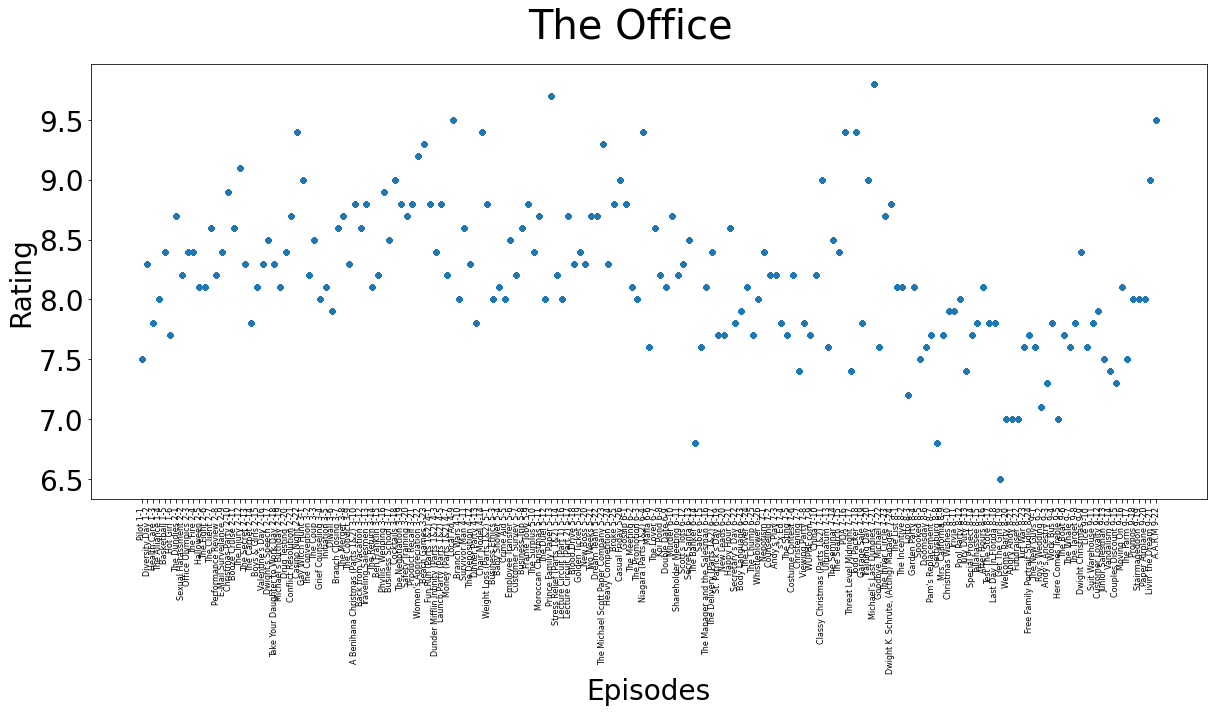

In [13]:
#plt.style.use('ggplot')

#fig, ax = plt.subplots(figsize=(20,8))

df_office.plot(x='name', y='averageRating', kind='scatter',figsize=(20,8))

plt.xlabel('Episodes',fontsize=28)
plt.ylabel('Rating',fontsize=28)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=28)

plt.suptitle('The Office',fontsize=40)
plt.show()

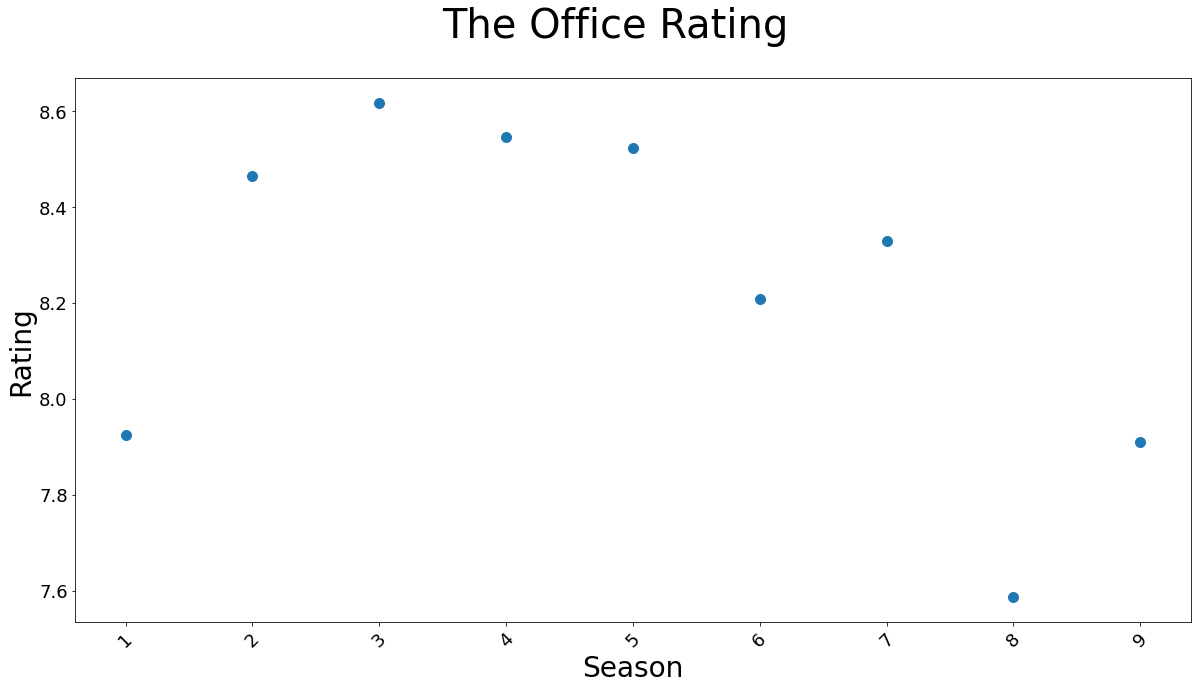

In [14]:

fig, ax = plt.subplots(figsize=(20,10))

#df_rat.plot(x='season', y="averageRating",kind='scatter')
plt.scatter(x=df_rat['season'],y=df_rat['averageRating'],s=100)
plt.xlabel('Season',fontsize=28)
plt.ylabel('Rating',fontsize=28)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(rotation=0, fontsize=18)

plt.suptitle('The Office Rating',fontsize=40)
plt.show()

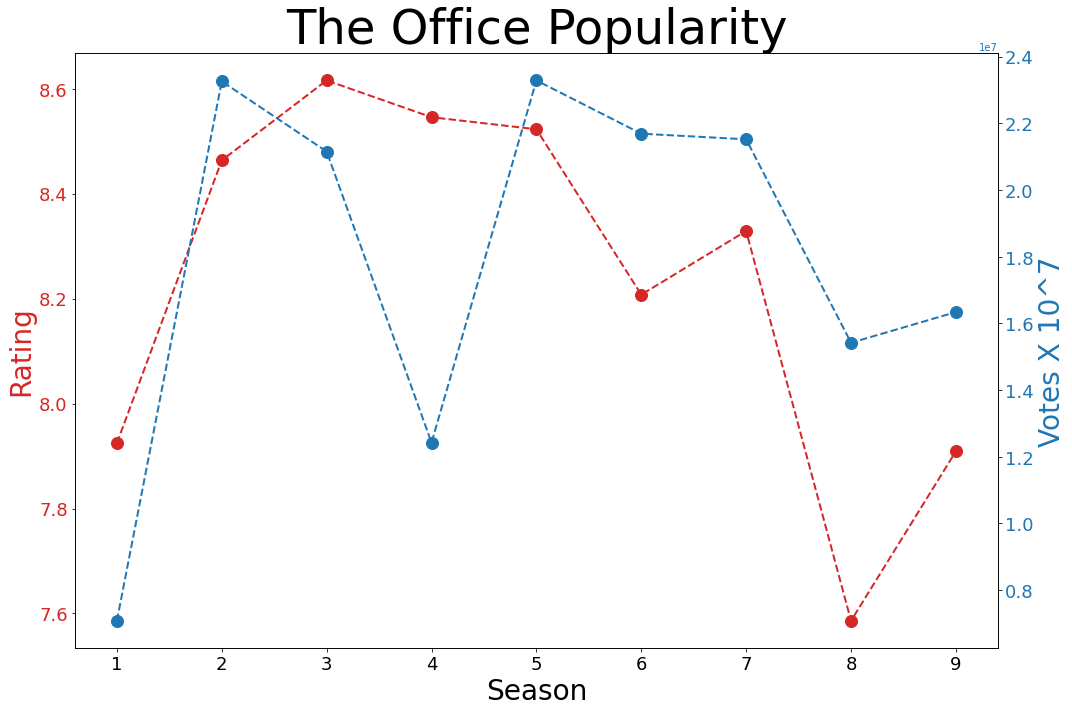

<Figure size 432x288 with 0 Axes>

In [15]:
fig, ax1 = plt.subplots(figsize=(15,10))

color = 'tab:red'
#ax1.scatter(x=df_rat['season'],y=df_rat['averageRating'],s=100)
ax1.plot(df_rat['season'],df_rat['averageRating'], color=color, marker='o', linestyle='dashed',linewidth=2, markersize=12)

ax1.set_xlabel('Season',fontsize=28)
ax1.set_ylabel('Rating',fontsize=28,color=color)
ax1.tick_params(axis='y', labelcolor=color,labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.set_title('The Office Popularity', fontsize = 48)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Votes X 10^7', color=color,fontsize=28)  # we already handled the x-label with ax1
#ax2.scatter(x=df_vote['season'],y=df_vote['numVotes'],s=100,color=color)
ax2.plot(df_vote['season'],df_vote['numVotes'], color=color, marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax2.tick_params(axis='y', labelcolor=color,labelsize=18)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
plt.savefig('images/popularity')

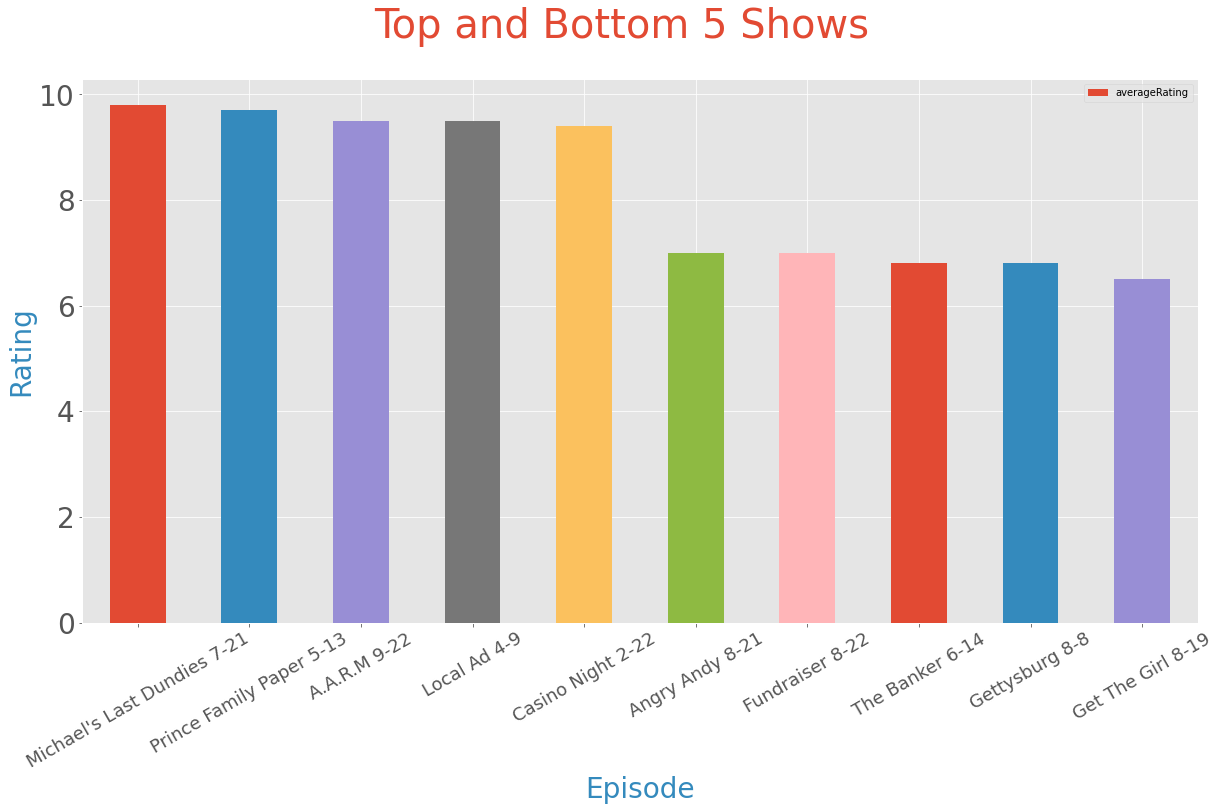

<Figure size 432x288 with 0 Axes>

In [37]:
top = df_popular[:5]
bottom = df_popular[-5:]
ten_show=pd.concat([top,bottom])

plt.style.use('ggplot')
#fig, ax = plt.subplots(figsize=(20,10))

ten_show.plot(x='name',y='averageRating',kind='bar',color=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9'],figsize=(20,10))

plt.xlabel('Episode',fontsize=28,color='C1')
plt.ylabel('Rating',fontsize=28,color='C1')
plt.xticks(rotation=30, fontsize=18)
plt.yticks(rotation=0, fontsize=28)

plt.suptitle('Top and Bottom 5 Shows',fontsize=40,color='C0')
plt.show()
plt.savefig('images/TopBottom5')

In [17]:
what_she_said = df_office[df_office['text'].str.contains("what she said",na=False)][['name','season','episode','character','averageRating']].reset_index()

In [18]:
what_she_said

,index,name,season,episode,character,averageRating
0,1938,Sexual Harassment 2-2,2,2,Michael,8.2
1,4011,Christmas Party 2-10,2,10,Michael,8.9
2,4654,The Injury 2-12,2,12,Dwight,9.1
3,5873,Dwight's Speech 2-17,2,17,Michael,8.5
4,6885,Conflict Resolution 2-21,2,21,Michael,8.7
5,7533,Gay Witch Hunt 3-1,3,1,Michael,9.0
6,9979,A Benihana Christmas (Parts 1&2) 3-10,3,10,Michael,8.8
7,10432,Traveling Salesmen 3-13,3,13,Dwight,8.8
8,11606,Cocktails 3-18,3,18,Michael,9.0
9,11682,Cocktails 3-18,3,18,Jan,9.0


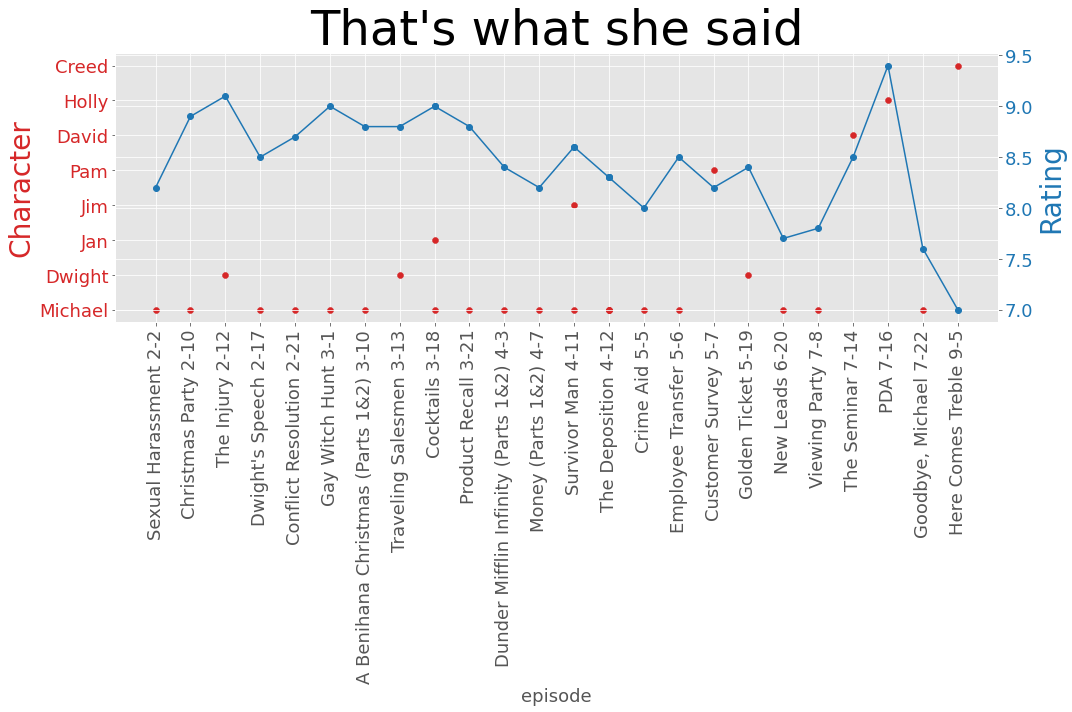

<Figure size 432x288 with 0 Axes>

In [38]:
fig, ax1 = plt.subplots(figsize=(15,10))

color = 'tab:red'
ax1.scatter(what_she_said['name'],what_she_said['character'], color=color, marker='o')

ax1.set_xlabel('episode',fontsize=18)
ax1.set_ylabel('Character',fontsize=28,color=color)
ax1.tick_params(axis='y', labelcolor=color,labelsize=18)
ax1.tick_params(axis='x', labelsize=18,rotation=90)
ax1.set_title("That's what she said", fontsize = 48)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Rating', color=color,fontsize=28)  # we already handled the x-label with ax1
ax2.plot(what_she_said['name'],what_she_said['averageRating'], color=color, marker='o')

ax2.tick_params(axis='y', labelcolor=color,labelsize=18)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
plt.savefig('images/shesaid')

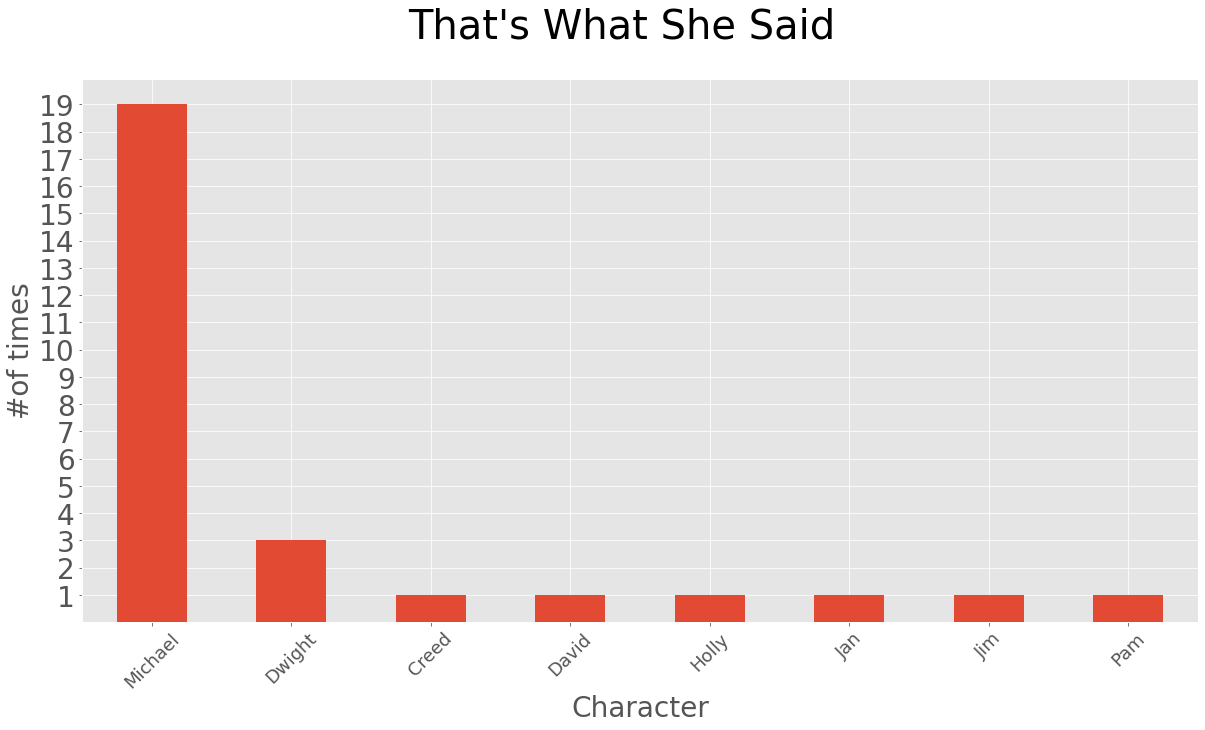

In [20]:
plt.style.use('ggplot')
grap = what_she_said[['character']].groupby(['character']).size().nlargest(20)

fig, ax = plt.subplots(figsize=(20,10))

grap.plot(kind='bar')
plt.yticks(np.arange(1,20,step=1))


plt.ylabel('#of times',fontsize=28)
plt.xlabel('Character',fontsize=28)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(rotation=0, fontsize=28)

plt.suptitle("That's What She Said",fontsize=40)
plt.show()

In [21]:
type(what_she_said)

pandas.core.frame.DataFrame

In [22]:
Michael = df_office[df_office['text'].str.contains("Michael",na=False)][['season','episode','character','averageRating']].reset_index()

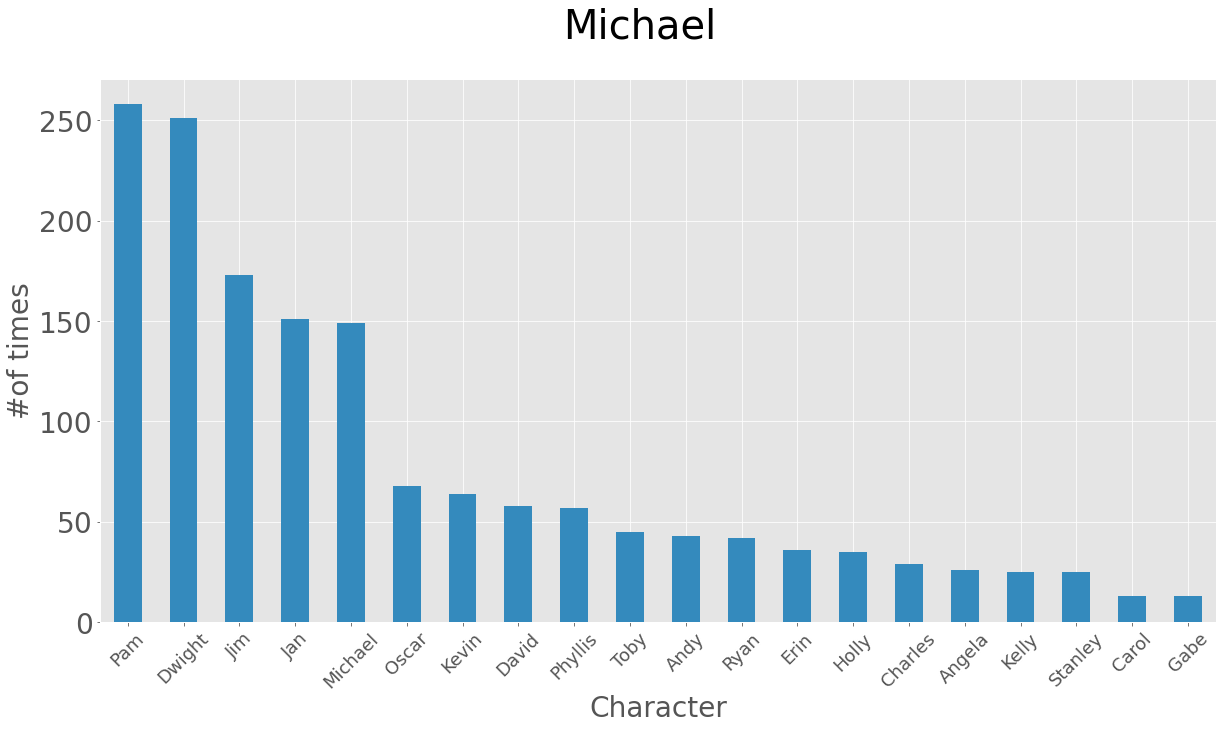

In [23]:
plt.style.use('ggplot')
grap = Michael[['character']].groupby(['character']).size().nlargest(20)

fig, ax = plt.subplots(figsize=(20,10))

grap.plot(kind='bar',color='C1')


plt.ylabel('#of times',fontsize=28)
plt.xlabel('Character',fontsize=28)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(rotation=0, fontsize=28)

plt.suptitle("Michael",fontsize=40)
plt.show()

In [24]:
df_office.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51437 entries, 0 to 51791
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     51437 non-null  int64  
 1   index          51437 non-null  int64  
 2   season         51437 non-null  int64  
 3   episode        51437 non-null  int64  
 4   episode_name   51437 non-null  object 
 5   director       51437 non-null  object 
 6   writer         51437 non-null  object 
 7   character      51437 non-null  object 
 8   text           51437 non-null  object 
 9   averageRating  51437 non-null  float64
 10  numVotes       51437 non-null  int64  
 11  name           51437 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 5.1+ MB


In [25]:
text1=df_office[df_office['name']=="Michael's Last Dundies 7-21"]['text']

In [26]:
text1.dropna(inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
list1=text1.tolist()

In [28]:
list1

['It is six a.m. and we are about to go house to house to give everyone their Dundie Nomination Certificates. Just like the Oscars!',
 'E-Mail forms you made us read.',
 'Yes, and this happens every...?',
 "Nine million, nine hundred eighty six thousand minutes! That's like watching Die Hard, eighty thousand times!",
 'Every year! This happens, you have a lot to learn my friend.',
 'You hit me with your car!',
 "Well, you know, why don't we try it, and if it goes good it'll be part of my tradition.",
 'You helped me get off drugs!',
 "Why do you always say that? You're gonna love it.",
 'I watch you when you sleep.',
 "Alright let's go! This way, this way!",
 'I forgive you for kissing me!',
 'Thanks.',
 'Remember to, call. Call. Remember to, call. Call. Remember to, call. Call.',
 'Surprise!',
 'Call, text or e-mail, or call.',
 'Congratulations!',
 'Measure your life in love!',
 'Yep, okay...',
 'Remember to call, remember to, call. Remember to call.',
 'You and Pam have both been no

In [29]:
str1=''

for strx in list1:
    str1 += strx

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [31]:
wordcloud = WordCloud(width=480, height=480, margin=0).generate(str1)

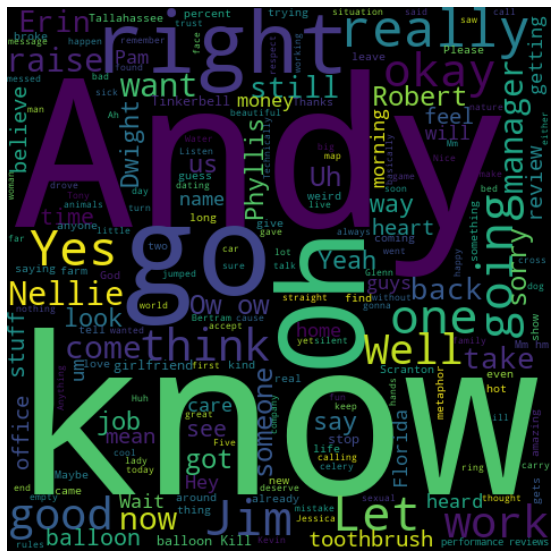

<Figure size 432x288 with 0 Axes>

In [39]:
plt.subplots(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
plt.savefig('images/bestshow_cloud')

In [33]:
df_popular

,name,Unnamed: 0,index,season,episode,averageRating,numVotes
83,Michael's Last Dundies 7-21,37548.789883,39871.789883,7.0,21.0,9.8,9248.0
101,Prince Family Paper 5-13,20318.137931,22094.137931,5.0,13.0,9.7,9218.0
1,A.A.R.M 9-22,51541.000000,54358.000000,9.0,22.0,9.5,4516.0
79,Local Ad 4-9,15418.927184,15927.927184,4.0,9.0,9.5,6328.0
21,Casino Night 2-22,7213.500000,7214.500000,2.0,22.0,9.4,5290.0
...,...,...,...,...,...,...,...
5,Angry Andy 8-21,44231.500000,47048.500000,8.0,21.0,7.0,2413.0
53,Fundraiser 8-22,44497.000000,47314.000000,8.0,22.0,7.0,2173.0
123,The Banker 6-14,27959.000000,30282.000000,6.0,14.0,6.8,3427.0
58,Gettysburg 8-8,40574.962025,43391.962025,8.0,8.0,6.8,2394.0


In [34]:
text2=df_office[df_office['name']=="Get The Girl 8-19"]['text']
text2.dropna(inplace=True)
list2=text2.tolist()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
str2=''

for strx in list2:
    str2 += strx

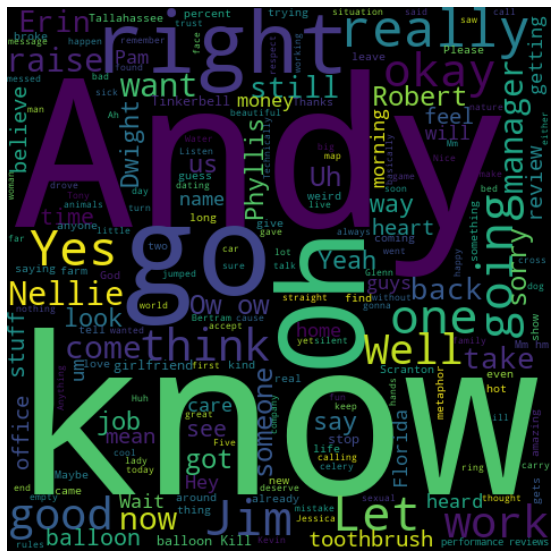

In [36]:
wordcloud = WordCloud(width=480, height=480, margin=0).generate(str2)
plt.subplots(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()